In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
data = pd.read_csv('../Downloads/exams.csv')

In [4]:
datamain = data

In [5]:
data

,exam_1,exam_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [6]:
data.head(5)

,exam_1,exam_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [7]:
data.describe()

,exam_1,exam_2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [8]:
testdata = data.copy()

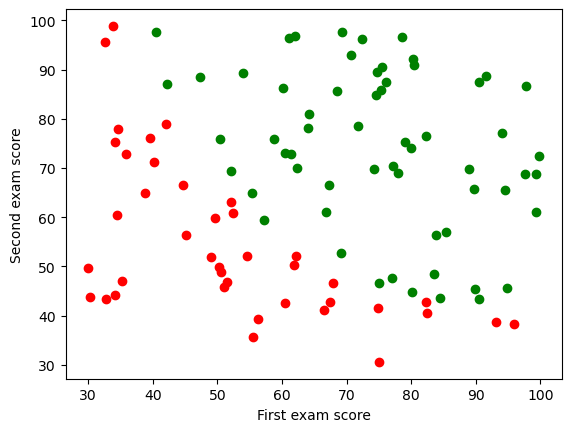

In [9]:
#visualization of data

plt.xlabel('First exam score')
plt.ylabel('Second exam score')

plt.scatter(data[data.admitted == 1]['exam_1'],data[data.admitted == 1]['exam_2'],color = 'green')
plt.scatter(data[data.admitted == 0]['exam_1'],data[data.admitted == 0]['exam_2'],color = 'red')

In [10]:
#nromalization of data


testdata['exam_1'] = (testdata['exam_1'] - testdata['exam_1'].min())/(testdata['exam_1'].max() - testdata['exam_1'].min())
testdata['exam_2'] = (testdata['exam_2'] - testdata['exam_2'].min())/(testdata['exam_2'].max() - testdata['exam_2'].min())

In [11]:
testdata


,exam_1,exam_2,admitted
0,0.065428,0.694655,0
1,0.003266,0.194705,0
2,0.082968,0.619618,0
3,0.431764,0.816001,1
4,0.701943,0.655392,1
...,...,...,...
95,0.765817,0.260407,1
96,0.174904,0.827651,1
97,0.992649,0.559166,1
98,0.362356,0.502865,1


In [12]:
testdata.describe()

,exam_1,exam_2,admitted
count,100.000000,100.000000,100.000000
mean,0.510046,0.521763,0.600000
std,0.278895,0.272211,0.492366
min,0.000000,0.000000,0.000000
25%,0.298996,0.257462,0.000000
50%,0.529951,0.543155,1.000000
75%,0.718853,0.714224,1.000000
max,1.000000,1.000000,1.000000


In [13]:
#COST FUNCTION

length = len(testdata)

x0 = np.ones(length)
allx = np.array([x0,testdata['exam_1'],testdata['exam_2']]).T

In [14]:
allw = np.array([0,1,2]) #random vlues for w0 w1 w2

In [15]:
def costfunction(Y,h):
    return (-Y*np.log(h) - (1 - Y)*np.log(1-h)).mean()

In [16]:
#SIGMAOID FUNCTION

def sigmaoid(z):
    res = 1.0 / (1 + np.exp(-z))
    return res

In [17]:
#PREDICTIONS

def probabilityofadmitted(X,W):
    val = np.dot(X,W)
    p = sigmaoid(val)
    
    return p

In [18]:
def predict(X,W):
    p = probabilityofadmitted(X,W)
    p[p>=0.5] = 1
    p[p<0.5] = 0
    
    return p

In [19]:
#GRADIENT DESCENT

def gradientdescent(X,Y,W,alpha = 0.1, iteration = 40000 ):
    costH = []
    
    
    for i in range(0,iteration + 1):
        
        x = np.dot(X,W)
        h = sigmaoid(x)
        g = np.dot(X.T, (h-testdata['admitted']))/ len(testdata['admitted'])
        W = W - alpha*g
        
        cost = costfunction(testdata['admitted'],h)
        costH.append(cost)
        
        if i % 5000 == 0:
            print('iteretion %d: '%i)
            print(cost)
            print()
            
    return W,costH

In [20]:
updated_W, costs = gradientdescent(allx,testdata['admitted'],allw)

iteretion 0: 
0.6255604816183551

iteretion 5000: 
0.24298402793609297

iteretion 10000: 
0.22030513626343112

iteretion 15000: 
0.21238162392540183

iteretion 20000: 
0.20866953927863818

iteretion 25000: 
0.2066795253723625

iteretion 30000: 
0.20552635762226415

iteretion 35000: 
0.2048235826122376

iteretion 40000: 
0.2043800426176673



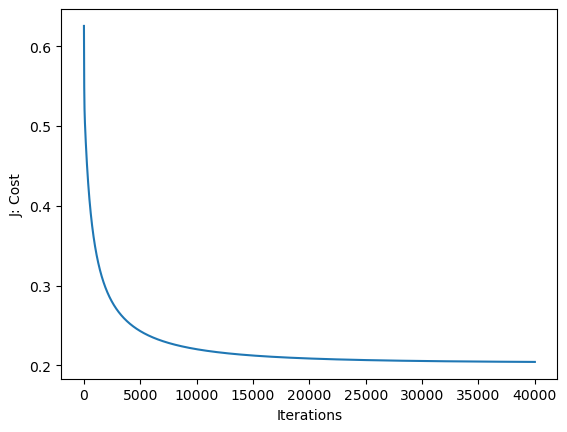

In [21]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('J: Cost')

plt.show()

In [22]:
updated_W

array([-11.60302504,  13.08213937,  12.46115324])

In [23]:
print(predict(allx, updated_W))

[0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1.]


In [24]:
#DESCREASING COST FUNCTION AFTER EACH ITERATIONS


from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot , iplot

print(__version__)
    

5.9.0


In [25]:
import cufflinks as cf


In [26]:
cf.go_offline()


In [27]:
pd.DataFrame(costs).reset_index().iplot(kind = 'line', x = 'index', y = 0 , xTitle = '# of iterations', yTitle = 'cost function value')

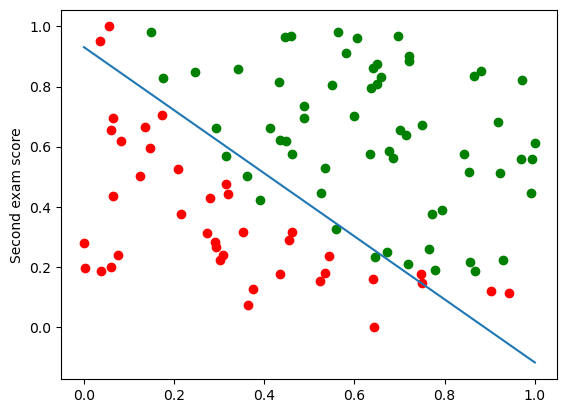

In [28]:
#DECISION BOUNDARY

plt.ylabel('Second exam score')
plt.scatter(testdata[testdata.admitted == 1]['exam_1'],testdata[testdata.admitted == 1]['exam_2'],color = 'green')
plt.scatter(testdata[testdata.admitted == 0]['exam_1'],testdata[testdata.admitted == 0]['exam_2'],color = 'red')

xLine = [np.min(testdata['exam_1']),np.max(testdata['exam_1'])]
yLine = - (updated_W[0] + np.dot(updated_W[1],xLine))/updated_W[2]
       
           
plt.plot(xLine,yLine)

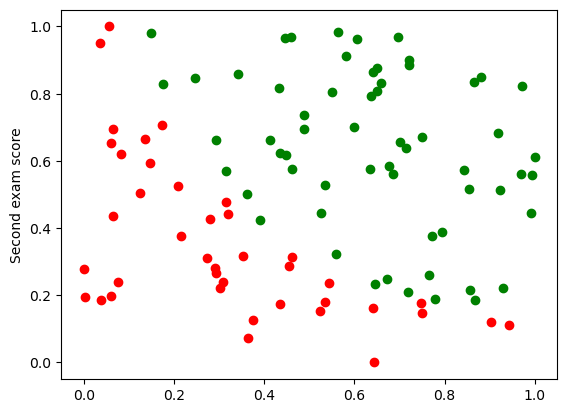

In [29]:
#DECISION BOUNDARY

plt.ylabel('Second exam score')
plt.scatter(testdata[testdata.admitted == 1]['exam_1'],testdata[testdata.admitted == 1]['exam_2'],color = 'green')
plt.scatter(testdata[testdata.admitted == 0]['exam_1'],testdata[testdata.admitted == 0]['exam_2'],color = 'red')

xLine = [np.min(testdata['exam_1']),np.max(testdata['exam_1'])]
yLine = - (updated_W[0] + np.dot(updated_W[1],xLine)/updated_W[2])
           
           